In this notebook:
a) I reflect the sqlite tables into SQLAlchemy ORM using automap_base and create the link from Python to DB using Session.
b) Then, I do the Exploratory Precipitation Analysis by designing a query to retrieve the last 12 months of precipitation data, saving the query results as a Pandas DataFrame and plotting using Matplotlib.
c) Lastly, I do the Exploratory Station Analysis by designing a query to calculate the total number stations in the dataset, calculate the lowest, highest, and average temperature for the most active station, querying the last 12 months of temperature observation data for this station and plotting the results as a histogram.

In [175]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [176]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [177]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import matplotlib.pyplot as plt

In [178]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [179]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [180]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [181]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [182]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [183]:
first_row = session.query(Measure).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa98089cb20>,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'prcp': 0.08,
 'date': '2010-01-01'}

In [184]:
# Find the most recent date in the data set.
recentdate = session.query(Measure.date).order_by(Measure.date.desc()).first()
#newdate = str(recentdate)
#print(type(newdate))
#newdate[2:-3]

In [185]:
query_date = dt.date(2017,8,23) - dt.timedelta(days = 365)
query_date

datetime.date(2016, 8, 23)

In [186]:
query_results = session.query(Measure.date, Measure.prcp).\
    filter(Measure.date > query_date).\
    order_by(Measure.date).all()

In [187]:
query_dates = session.query(Measure.date).all()
query_prcp = session.query(Measure.prcp).all()
rcp_dict = dict(zip(query_dates, query_prcp))
rcp_dict

{('2010-01-01',): (0.14,),
 ('2010-01-02',): (0.0,),
 ('2010-01-03',): (0.0,),
 ('2010-01-04',): (0.0,),
 ('2010-01-06',): (0.36,),
 ('2010-01-07',): (0.3,),
 ('2010-01-08',): (0.0,),
 ('2010-01-09',): (0.0,),
 ('2010-01-10',): (0.01,),
 ('2010-01-11',): (0.14,),
 ('2010-01-12',): (0.0,),
 ('2010-01-14',): (0.0,),
 ('2010-01-15',): (0.0,),
 ('2010-01-16',): (0.0,),
 ('2010-01-17',): (0.0,),
 ('2010-01-18',): (0.0,),
 ('2010-01-19',): (0.0,),
 ('2010-01-20',): (0.0,),
 ('2010-01-21',): (0.32,),
 ('2010-01-22',): (0.0,),
 ('2010-01-23',): (0.0,),
 ('2010-01-24',): (0.01,),
 ('2010-01-25',): (0.0,),
 ('2010-01-26',): (0.03,),
 ('2010-01-27',): (0.31,),
 ('2010-01-28',): (0.07,),
 ('2010-01-30',): (0.33,),
 ('2010-01-31',): (1.1,),
 ('2010-02-01',): (0.01,),
 ('2010-02-03',): (0.67,),
 ('2010-02-04',): (0.0,),
 ('2010-02-05',): (0.09,),
 ('2010-02-06',): (0.04,),
 ('2010-02-07',): (0.0,),
 ('2010-02-08',): (0.0,),
 ('2010-02-09',): (0.0,),
 ('2010-02-11',): (0.0,),
 ('2010-02-12',): (0.65,

In [188]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017,8,23) - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
query_results = session.query(Measure.date, Measure.prcp).\
    filter(Measure.date > query_date).\
    order_by(Measure.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
measuredf = pd.DataFrame(query_results,
                         columns =['Date', 'Prcp'])
measuredf.set_index("Date",inplace=True)
measuredf


,Prcp
Date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


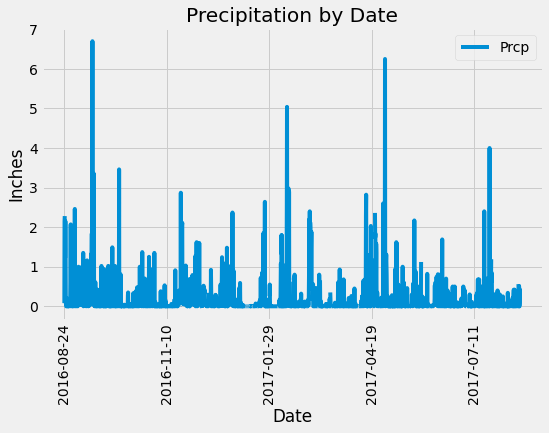

In [189]:
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
measuredf.plot(rot=90, figsize=(8,5),title="Precipitation by Date")
plt.ylabel("Inches")
plt.savefig("Images/precipitation.png")

In [190]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measuredf.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [191]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measure).group_by(Measure.station).count()
   # filter(Measure.station).\
print(f"The total number of stations in the dataset are {station_count}")

The total number of stations in the dataset are 9


In [192]:
stations = session.query(
    Measure.station, func.count(Measure.station)).group_by(Measure.station).\
    order_by(func.count(Measure.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [193]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
st = [Measure.station, 
       func.max(Measure.tobs), 
       func.min(Measure.tobs), 
       func.avg(Measure.tobs)]
active_station_stats = session.query(*st).\
    filter(Measure.station == 'USC00519281').all()
active_station_stats

[('USC00519281', 85.0, 54.0, 71.66378066378067)]

In [194]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_recentdate = session.query(Measure.date).\
    filter(Measure.station == 'USC00519281').\
    order_by(Measure.date.desc()).first()
station_recentdate

('2017-08-18',)

In [195]:
st_query_date = dt.date(2017,8,18) - dt.timedelta(days = 365)
st_query_date

datetime.date(2016, 8, 18)

In [196]:
st_query_results = session.query(Measure.date,Measure.tobs).\
    filter(Measure.date > st_query_date).\
    filter(Measure.station == 'USC00519281').\
    order_by(Measure.date).all()
st_query_results

[('2016-08-19', 79.0),
 ('2016-08-20', 81.0),
 ('2016-08-21', 79.0),
 ('2016-08-22', 78.0),
 ('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-

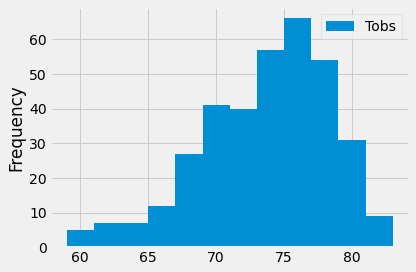

In [197]:
df = pd.DataFrame(st_query_results, columns=['Date','Tobs'])
df.set_index('Date', inplace=True)
df.plot.hist(bins = 12)
plt.tight_layout()
plt.savefig("Images/station-histogram.png")
plt.show()

# Close session

In [198]:
# Close Session
session.close()